In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# lectura de datos en Python
train = pd.read_csv('./../data/train.csv')
test = pd.read_csv('./../data/test.csv')

In [7]:
train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [3]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train.shape

(891, 12)

In [5]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
train.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [16]:
train.groupby(['Survived', 'Sex']).count()['PassengerId']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


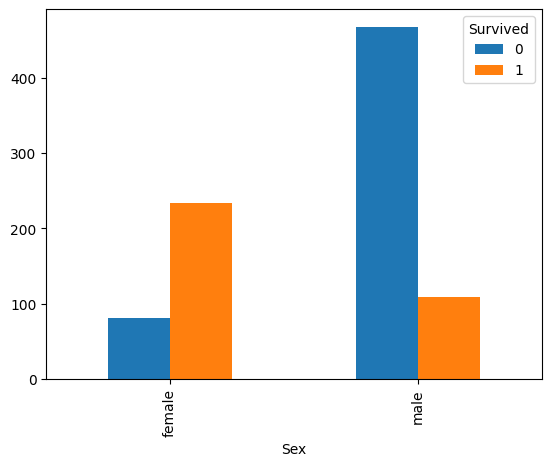

In [17]:
grouped_sex = train.groupby(['Survived','Sex']).count()['PassengerId']
print(grouped_sex)
(grouped_sex.unstack(level=0).plot.bar())
plt.show()

AxesSubplot(0.125,0.11;0.775x0.77)


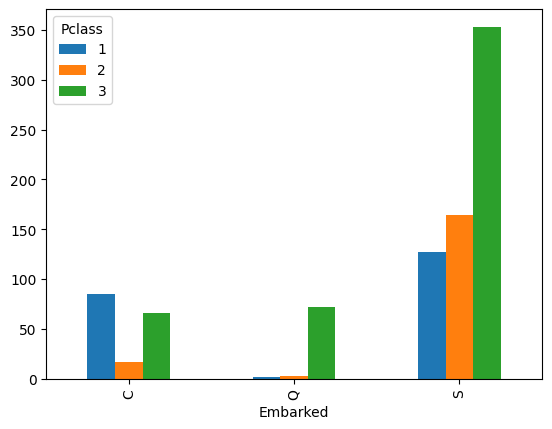

In [18]:
print(train.groupby(['Pclass', 'Embarked'])
        .count()['PassengerId']
        .unstack(level=0)
        .plot.bar())

In [19]:
train[['Survived', 'Sex', 'Age', 'Pclass']].head(3)


,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3


In [20]:
train[['Survived', 'Sex', 'Age', 'Pclass']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [21]:
# mirar como se distribuyen los nulos en edad
(train[train['Age'].isna()]
      .groupby(['Sex', 'Pclass'])
      .count()['PassengerId']
      .unstack(level=0))

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


In [22]:
(train[train['Age'].isna()]
      .groupby(['SibSp', 'Parch'])
      .count()['PassengerId']
      .unstack(level=0))

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


In [23]:
# calcular mediana de Age para imputar
train['Age'].median()

28.0

In [24]:
# imputar valor para rellenar nulos
train['Age'] = train['Age'].fillna(28.0)
train[['Survived', 'Sex', 'Age', 'Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [25]:
# map para label encoding
train['Sex'] = train['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [26]:
train[['Survived', 'Sex', 'Age', 'Pclass']].head(3)


,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3


In [27]:
# crear nueva variable tipo flag "solo"
train['FlagSolo'] = np.where(
    (train['SibSp'] == 0) & (train['Parch'] == 0), 1, 0)

Survived  FlagSolo
0         0           175
          1           374
1         0           179
          1           163
Name: PassengerId, dtype: int64


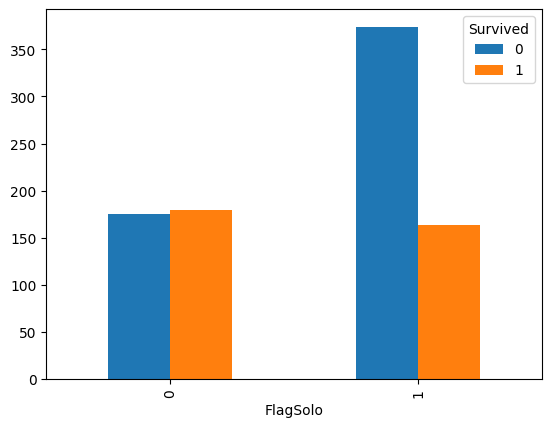

In [28]:
grouped_flag = train.groupby(['Survived','FlagSolo']).count()['PassengerId']
print(grouped_flag)
(grouped_flag.unstack(level=0).plot.bar())
plt.show()

In [29]:
train[['Survived', 'Sex', 'Age', 'Pclass', 'FlagSolo']].head(3)


,Survived,Sex,Age,Pclass,FlagSolo
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1


In [32]:
# variable dependiente
Y_train = train['Survived']

# preprocesamiento de variables independientes
features = ['Sex', 'Age', 'Pclass', 'FlagSolo']
X_train = train[features]

print(Y_train.shape, X_train.shape)

(891,) (891, 4)


ModuleNotFoundError: No module named 'sklearn'